In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

d = 80 # m
u = 1 # m/s
r = 40 # m
dim = 200

mpl.rcParams['figure.dpi'] = 300

In [2]:
def getPsi(U, r, theta, R=40):
    return U*(r-(R**2/r))*math.sin(theta)

In [3]:
def getPsiCylinder(U, x, y, a=40):
    return U*np.sqrt(x**2+y**2)*(1-(a**2/(x**2 + y**2)))*np.sin(np.arctan(y/x))

In [4]:
getPsiCylinder(u, 10, 16)

-55.91011235955056

In [5]:
x = np.arange(-100, 101)
y = np.arange(-100, 101)

X, Y = np.meshgrid(x, y)

In [6]:
X

array([[-100,  -99,  -98, ...,   98,   99,  100],
       [-100,  -99,  -98, ...,   98,   99,  100],
       [-100,  -99,  -98, ...,   98,   99,  100],
       ...,
       [-100,  -99,  -98, ...,   98,   99,  100],
       [-100,  -99,  -98, ...,   98,   99,  100],
       [-100,  -99,  -98, ...,   98,   99,  100]])

In [7]:
Y

array([[-100, -100, -100, ..., -100, -100, -100],
       [ -99,  -99,  -99, ...,  -99,  -99,  -99],
       [ -98,  -98,  -98, ...,  -98,  -98,  -98],
       ...,
       [  98,   98,   98, ...,   98,   98,   98],
       [  99,   99,   99, ...,   99,   99,   99],
       [ 100,  100,  100, ...,  100,  100,  100]])

In [8]:
Z = getPsiCylinder(u, X, Y)

<ipython-input-3-a8870e63d80e>:2: RuntimeWarning: divide by zero encountered in true_divide
  return U*np.sqrt(x**2+y**2)*(1-(a**2/(x**2 + y**2)))*np.sin(np.arctan(y/x))
<ipython-input-3-a8870e63d80e>:2: RuntimeWarning: invalid value encountered in multiply
  return U*np.sqrt(x**2+y**2)*(1-(a**2/(x**2 + y**2)))*np.sin(np.arctan(y/x))
<ipython-input-3-a8870e63d80e>:2: RuntimeWarning: invalid value encountered in true_divide
  return U*np.sqrt(x**2+y**2)*(1-(a**2/(x**2 + y**2)))*np.sin(np.arctan(y/x))


In [9]:
X[3][1]

-99

In [10]:
Y[3][1]

-97

In [11]:
Z[3][1]

88.92087454450807

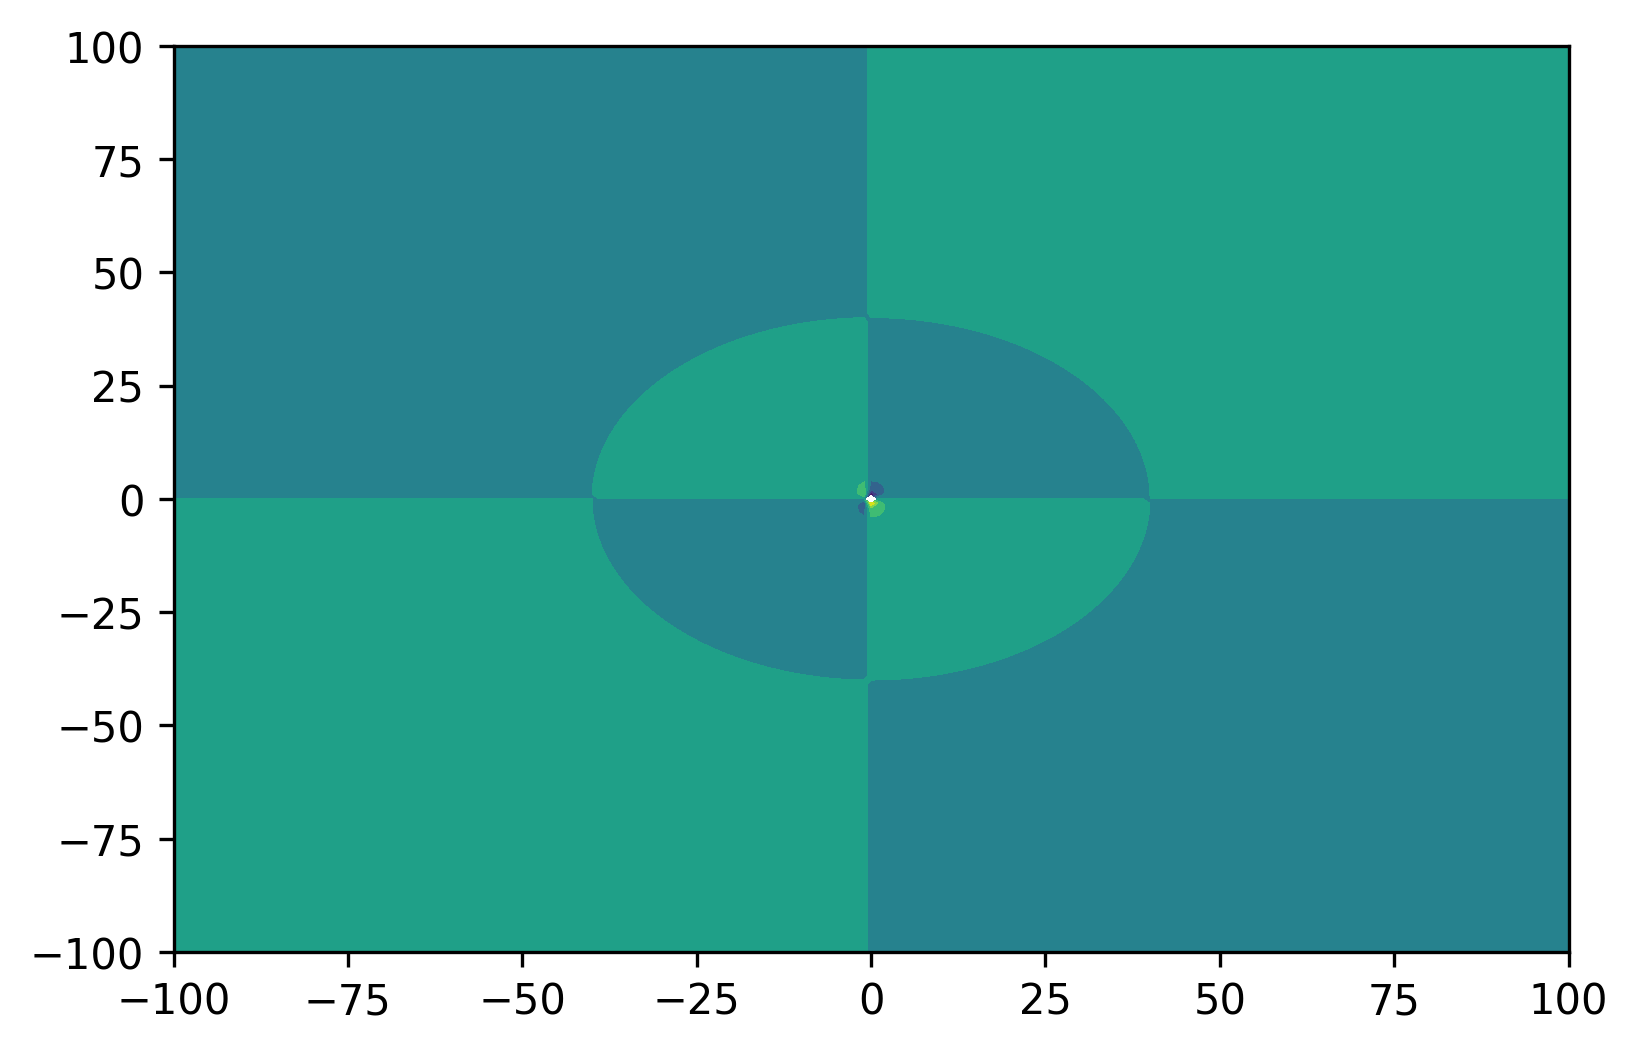

In [12]:
plt.contourf(X, Y, Z)